In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#df = pd.read_csv("Book3.csv")
url = 'https://github.com/Tomerman12/tomer-man/blob/main/Book3.xlsx?raw=true'
df = pd.read_excel(url) # Load Excel sheet from the given Github url


**EDA**

*Cleaning data*

In [5]:
# Check missing values

for i in df['Year']:
  pass
  

# This code check the data set for missing entries
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()
else : print("No missing entries")

No missing entries


In [6]:
for i in range(len(df.columns.values)):
  print(df.columns.values[i])

df.head
df.tail(40)
    

Presidant
political currents
Year
Population
Violent crime
Murder and nonnegligent 
manslaughter
Rape (legacy definition)
Robbery
Aggravated assault
Property crime
Burglary
Larceny-theft
Motor vehicle theft
Total criame


,Presidant,political currents,Year,Population,Violent crime,Murder and nonnegligent \nmanslaughter,Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Total criame
0,George H. W. Bush,republicans,1991,252153092,1911767,24703,106593,687732,1092739,12961116,3157150,8142228,1661738,29745766
1,George H. W. Bush,republicans,1992,255029699,1932274,23760,109062,672478,1126974,12505917,2979884,7915199,1610834,28876382
2,Bill Clinton,democratic,1993,257782608,1926017,24526,106014,659870,1135607,12218777,2834808,7820909,1563060,28289588
3,Bill Clinton,democratic,1994,260327021,1857670,23326,102216,618949,1113179,12131873,2712774,7879812,1539287,27979086
4,Bill Clinton,democratic,1995,262803276,1798792,21606,97470,580509,1099207,12063935,2593784,7997710,1472441,27725454
5,Bill Clinton,democratic,1996,265228572,1688540,19645,96252,535594,1037049,11805323,2506400,7904685,1394238,26987726
6,Bill Clinton,democratic,1997,267783607,1636096,18208,96153,498534,1023201,11558475,2460526,7743760,1354189,26389142
7,Bill Clinton,democratic,1998,270248003,1533887,16974,93144,447186,976583,10951827,2332735,7376311,1242781,24971428
8,Bill Clinton,democratic,1999,272690813,1426044,15522,89411,409371,911740,10208334,2100739,6955520,1152075,23268756
9,Bill Clinton,democratic,2000,281421906,1425486,15586,90178,408016,911706,10182584,2050992,6971590,1160002,23216140


In [7]:
# Check duplicate values

# This code check the data set for duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


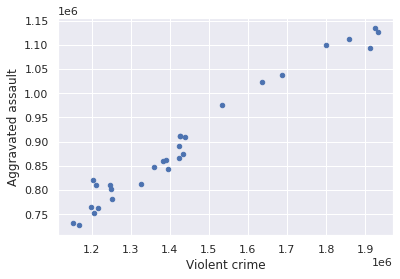

In [8]:
df.plot.scatter(x='Violent crime',y='Aggravated assault')

*Data types*

In [9]:
# set identifier "Year" as string
df['Presidant'] = df['Presidant'].astype('str')
df['political currents'] = df['political currents'].astype('str')

# set categorical data
df['Year'] = df['Year'].astype('str')
df['Population'] = df['Population'].astype('int')
df['Violent crime'] = df['Violent crime'].astype('int')
#df['Murder and nonnegligent manslaughter'] = df['Murder and nonnegligent manslaughter'].astype('int')
df['Rape (legacy definition)'] = df['Rape (legacy definition)'].astype('int')
df['Robbery'] = df['Robbery'].astype('int')
df['Aggravated assault'] = df['Aggravated assault'].astype('int')
df['Property crime'] = df['Property crime'].astype('int')
df['Burglary'] = df['Burglary'].astype('int')
df['Larceny-theft'] = df['Larceny-theft'].astype('int')
df['Motor vehicle theft'] = df['Motor vehicle theft'].astype('int')
df['Total criame'] = df['Total criame'].astype('int')



# Checking the data type
df.dtypes

Presidant                                 object
political currents                        object
Year                                      object
Population                                 int64
Violent crime                              int64
Murder and nonnegligent \nmanslaughter     int64
Rape (legacy definition)                   int64
Robbery                                    int64
Aggravated assault                         int64
Property crime                             int64
Burglary                                   int64
Larceny-theft                              int64
Motor vehicle theft                        int64
Total criame                               int64
dtype: object

*Numeric EDA*

In [10]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Population,29.0,2.933232e+08,2.443493e+07,252153092.0,270248003.0,296507061.0,313873685.0,328239523.0
Violent crime,29.0,1.442052e+06,2.447367e+05,1153022.0,1247917.0,1394461.0,1533887.0,1932274.0
Murder and nonnegligent \nmanslaughter,29.0,1.751552e+04,3.082526e+03,14164.0,15586.0,16465.0,17413.0,24703.0
Rape (legacy definition),29.0,9.420448e+04,6.801118e+03,82109.0,90178.0,94347.0,97470.0,109062.0
Robbery,29.0,4.352508e+05,1.148221e+05,267988.0,354746.0,414235.0,449246.0,687732.0
Aggravated assault,29.0,8.950814e+05,1.268791e+05,726777.0,810319.0,862220.0,976583.0,1135607.0
Property crime,29.0,9.973769e+06,1.637862e+06,6925677.0,9001992.0,10174754.0,10951827.0,12961116.0
Burglary,29.0,2.145939e+06,4.779880e+05,1117696.0,2050992.0,2155448.0,2332735.0,3157150.0
Larceny-theft,29.0,6.734469e+06,8.849013e+05,5086096.0,6151095.0,6783447.0,7376311.0,8142228.0
Motor vehicle theft,29.0,1.093361e+06,3.220360e+05,686803.0,751904.0,1160002.0,1261226.0,1661738.0


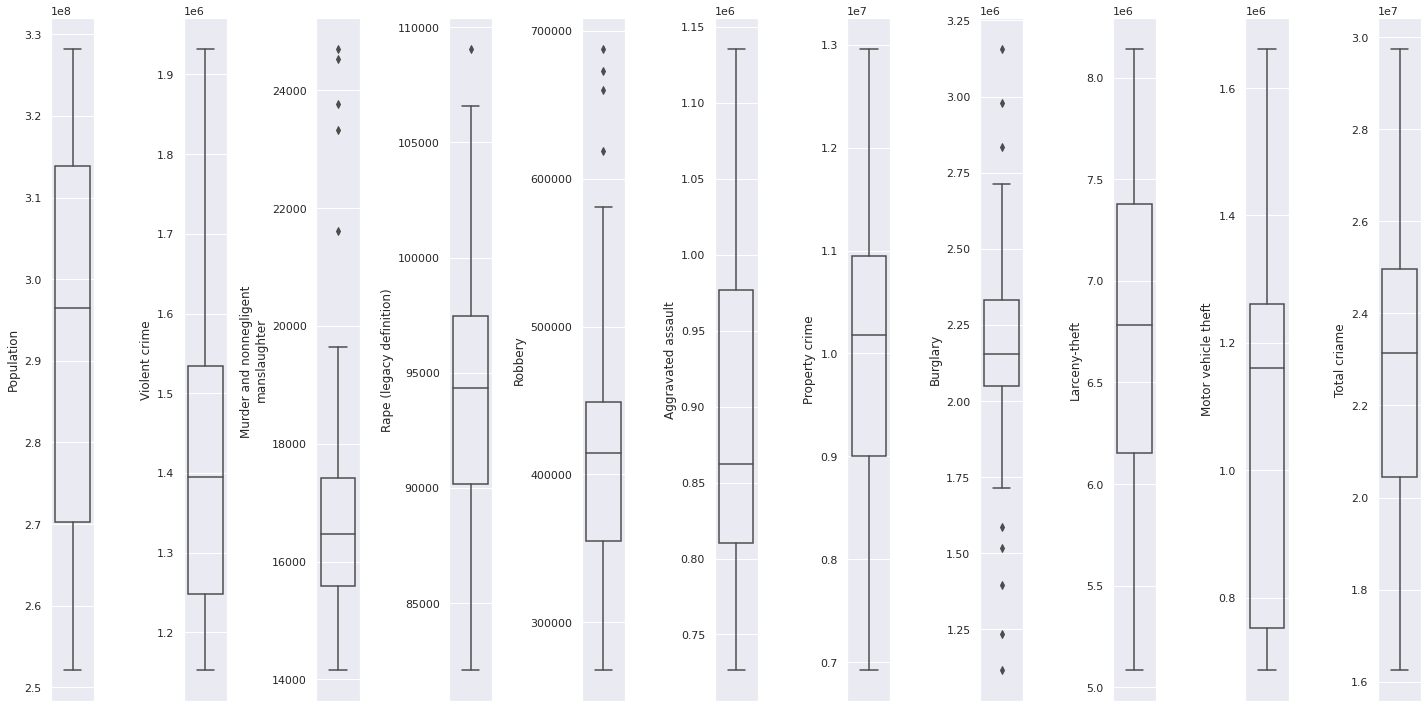


To check pairwise joint distribution of numeric data


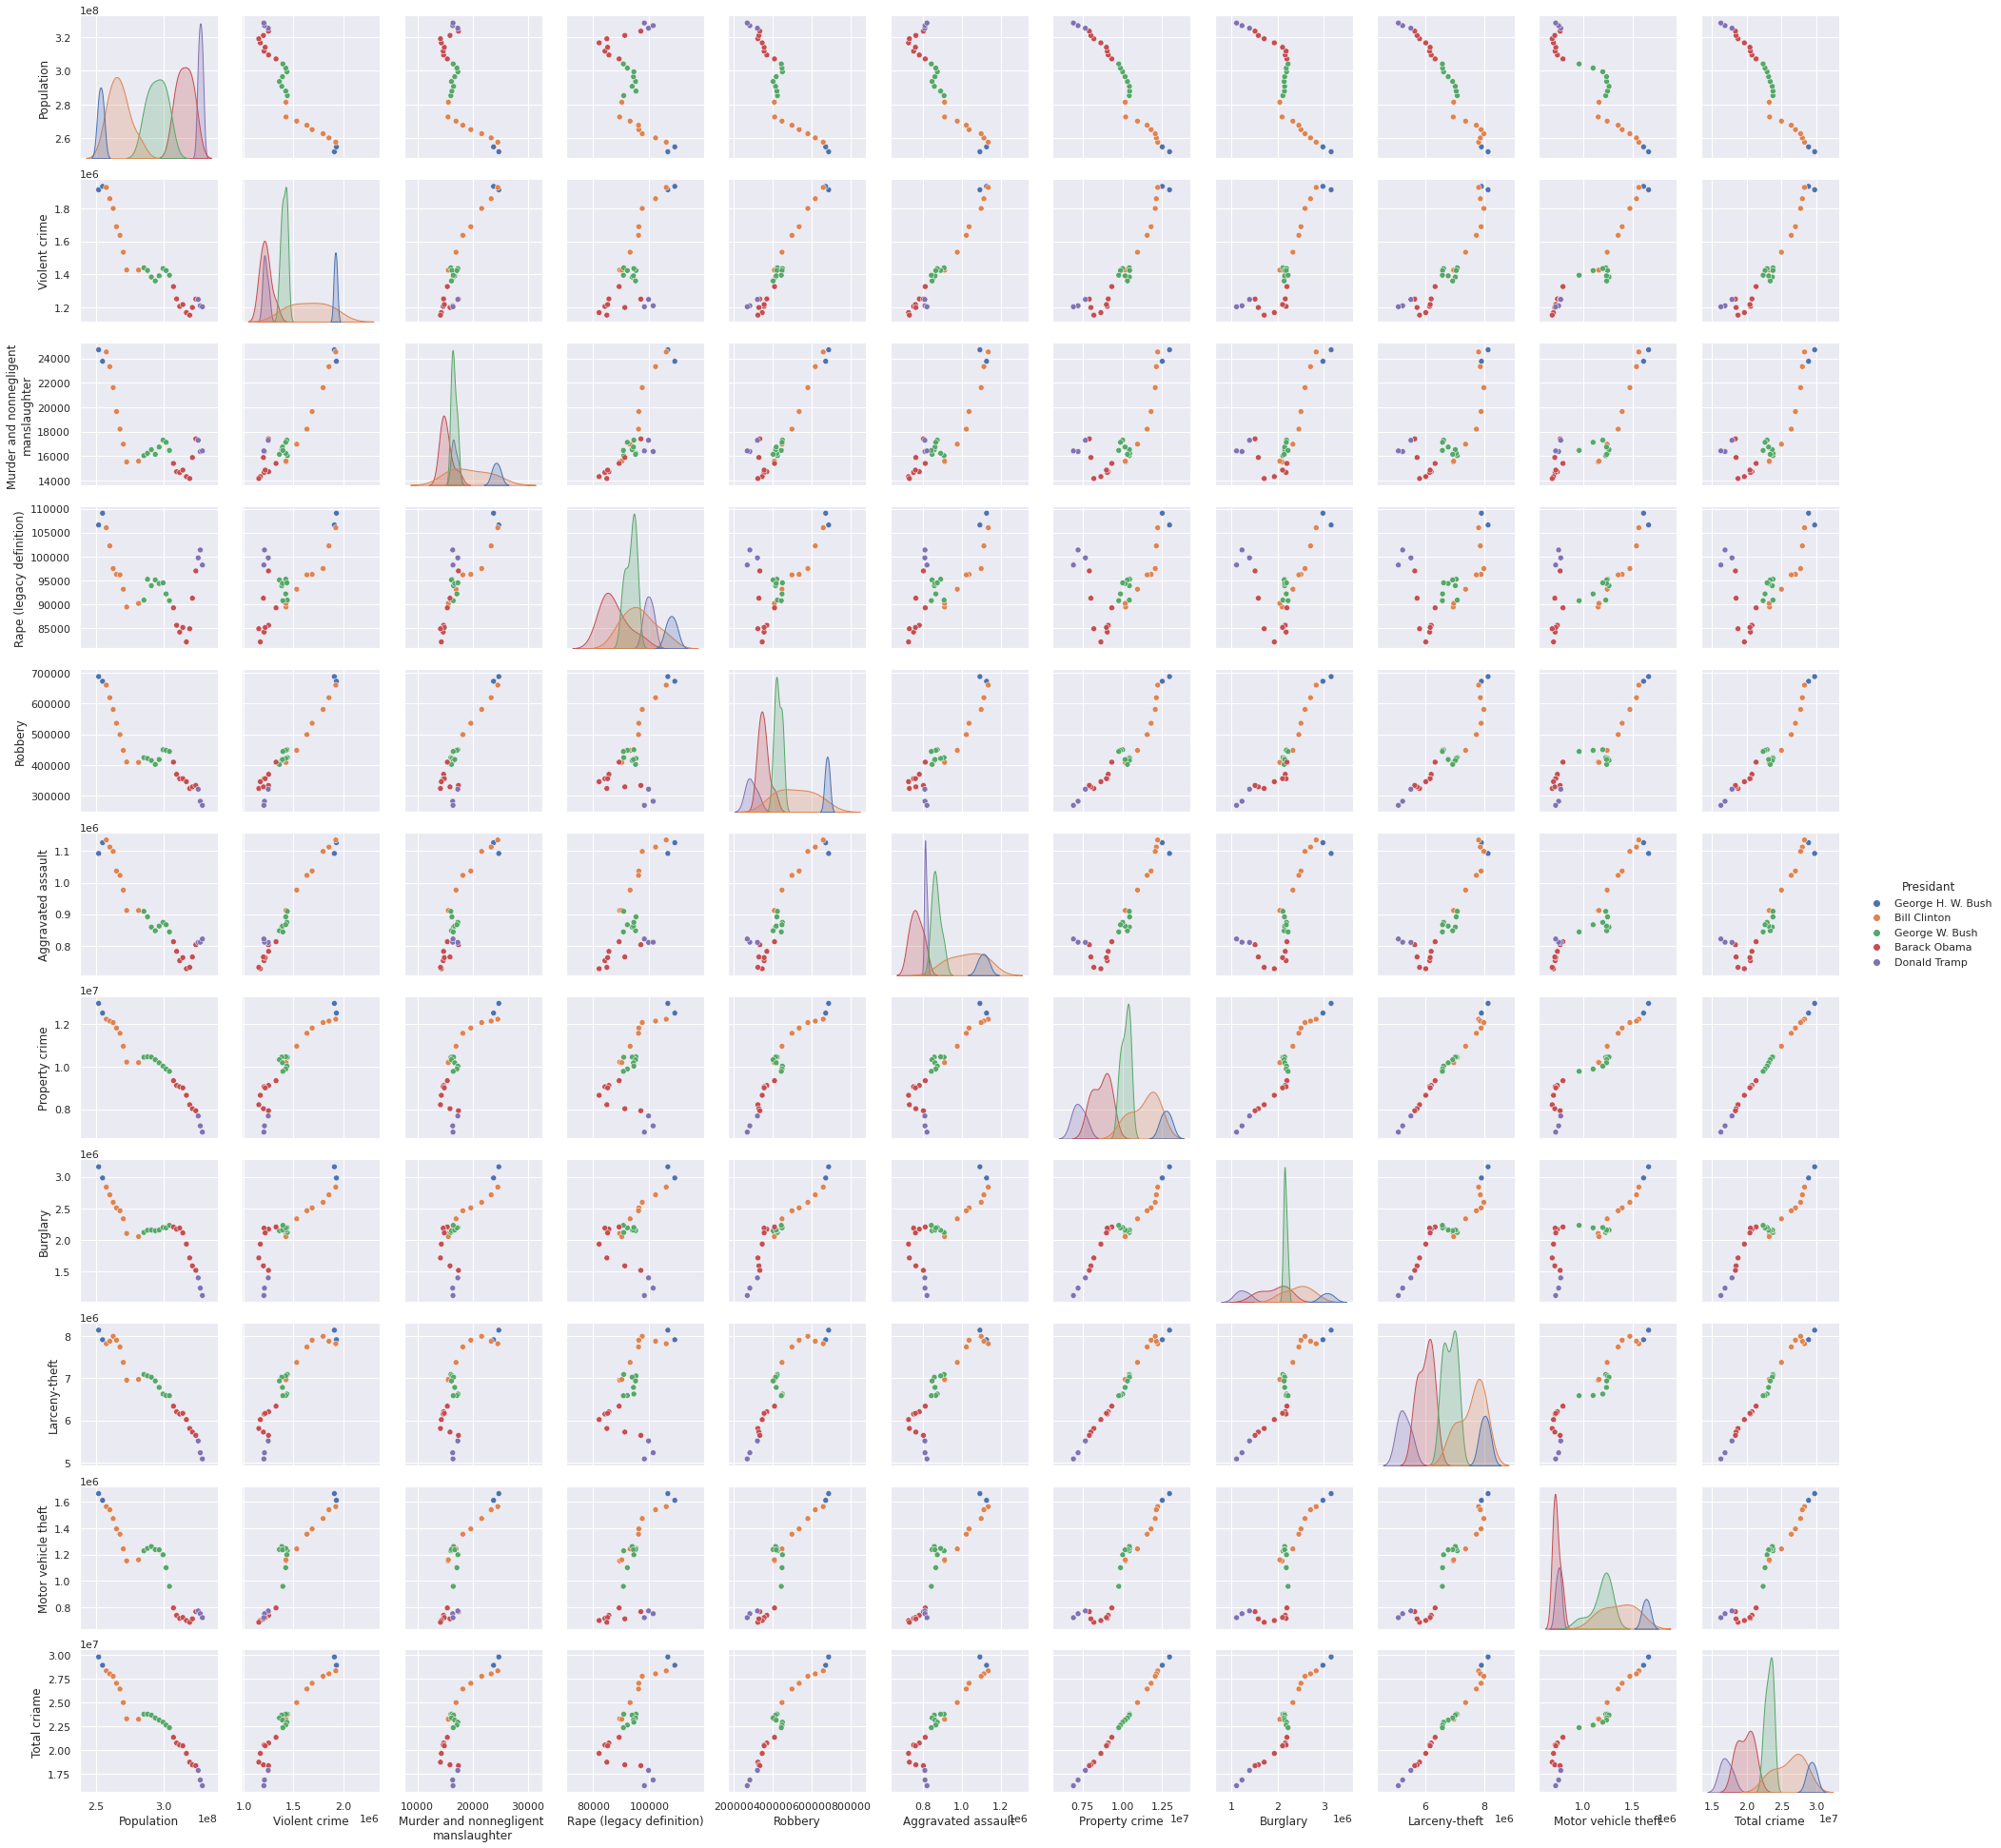

In [12]:
numeric_eda(df, hue='Presidant')

# New Section


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Population,29.0,2.933232e+08,2.443493e+07,252153092.0,270248003.0,296507061.0,313873685.0,328239523.0
Violent crime,29.0,1.442052e+06,2.447367e+05,1153022.0,1247917.0,1394461.0,1533887.0,1932274.0
Murder and nonnegligent \nmanslaughter,29.0,1.751552e+04,3.082526e+03,14164.0,15586.0,16465.0,17413.0,24703.0
Rape (legacy definition),29.0,9.420448e+04,6.801118e+03,82109.0,90178.0,94347.0,97470.0,109062.0
Robbery,29.0,4.352508e+05,1.148221e+05,267988.0,354746.0,414235.0,449246.0,687732.0
Aggravated assault,29.0,8.950814e+05,1.268791e+05,726777.0,810319.0,862220.0,976583.0,1135607.0
Property crime,29.0,9.973769e+06,1.637862e+06,6925677.0,9001992.0,10174754.0,10951827.0,12961116.0
Burglary,29.0,2.145939e+06,4.779880e+05,1117696.0,2050992.0,2155448.0,2332735.0,3157150.0
Larceny-theft,29.0,6.734469e+06,8.849013e+05,5086096.0,6151095.0,6783447.0,7376311.0,8142228.0
Motor vehicle theft,29.0,1.093361e+06,3.220360e+05,686803.0,751904.0,1160002.0,1261226.0,1661738.0


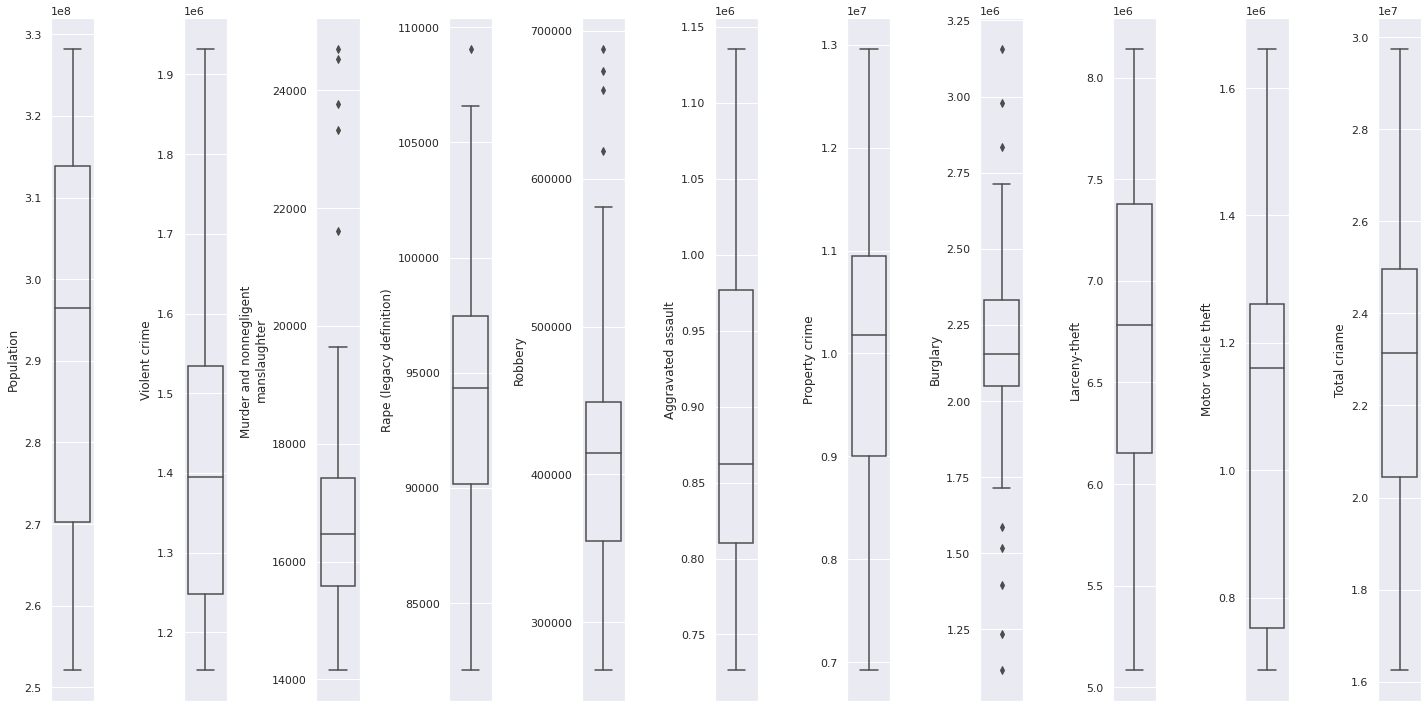


To check pairwise joint distribution of numeric data


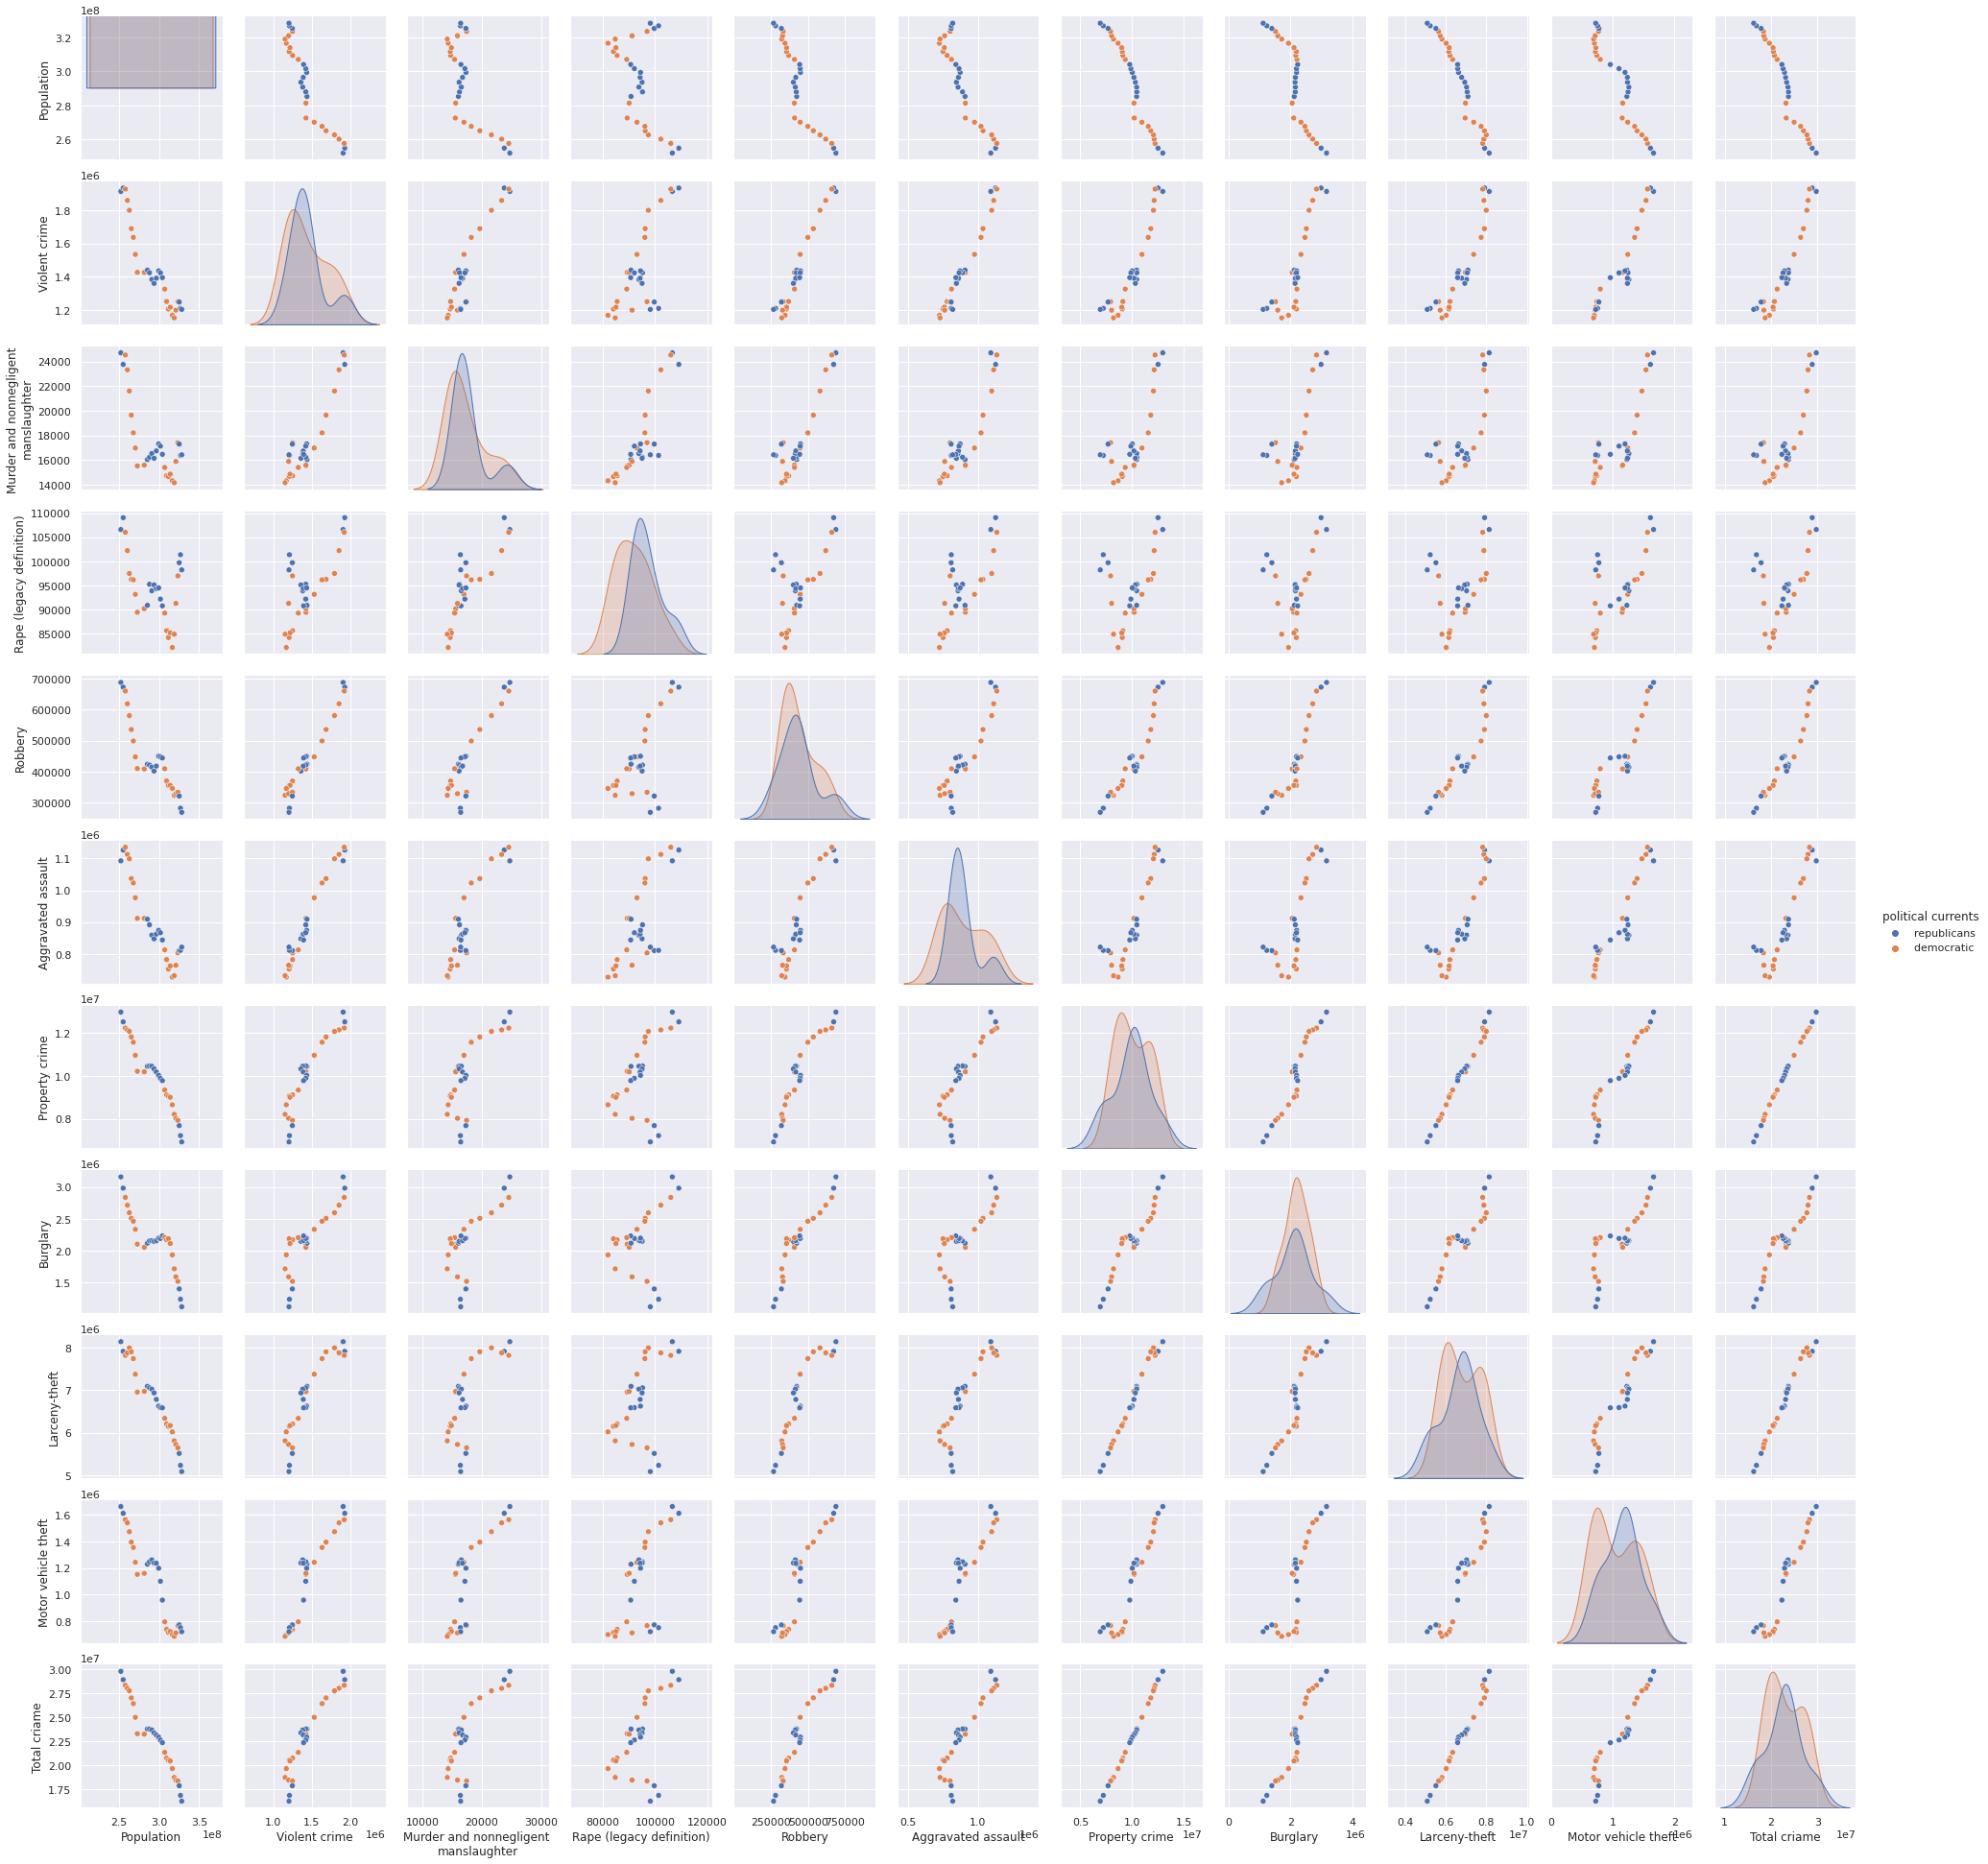

In [ ]:
numeric_eda(df, hue='political currents')

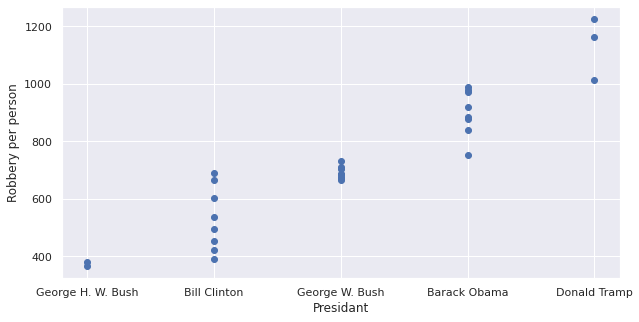

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Presidant'], df['Population']/df['Robbery'])
ax.set_xlabel('Presidant')
ax.set_ylabel('Robbery per person')
plt.show()






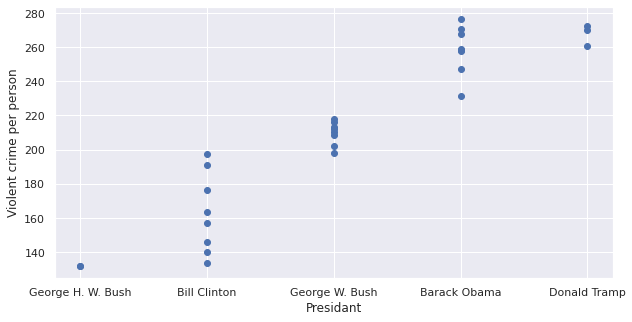

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Presidant'], df['Population']/df['Violent crime'])
ax.set_xlabel('Presidant')
ax.set_ylabel('Violent crime per person')
plt.show()

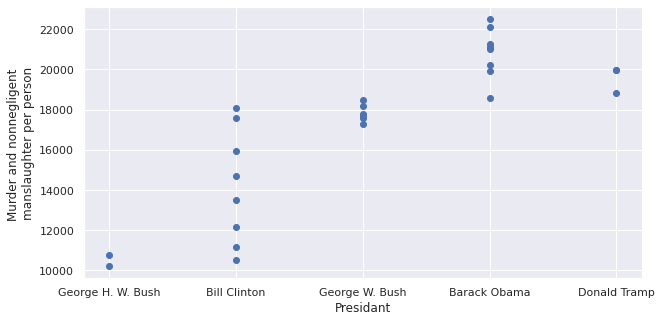

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Presidant'], df['Population']/df['Murder and nonnegligent \nmanslaughter'])
ax.set_xlabel('Presidant')
ax.set_ylabel('Murder and nonnegligent \nmanslaughter per person')
plt.show()

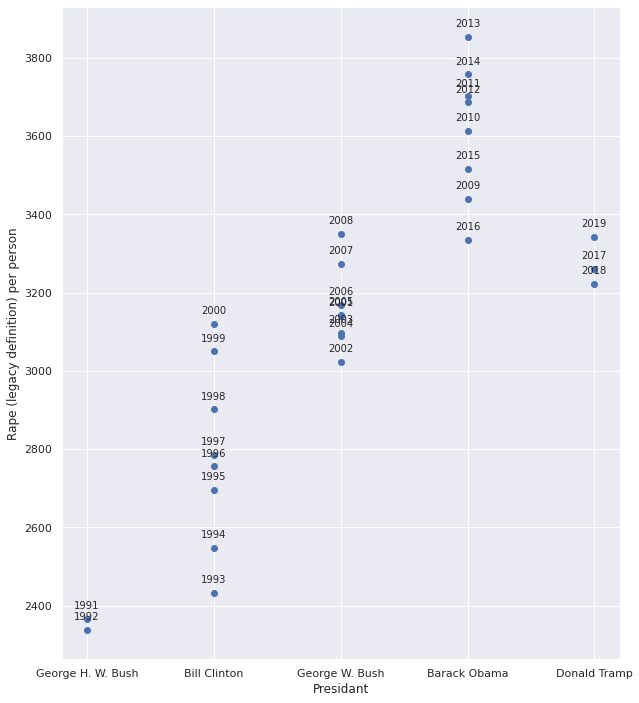

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
ax.scatter(df['Presidant'], df['Population']/df['Rape (legacy definition)'])
ax.set_xlabel('Presidant')
ax.set_ylabel('Rape (legacy definition) per person')
xs = df['Presidant'] 
ys = df['Population']/df['Rape (legacy definition)']

l = list(df['Year'])
for x,y in zip(xs,ys):
  label = l[0]
  l.remove(l[0])
  ax.annotate(label,(x,y), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()


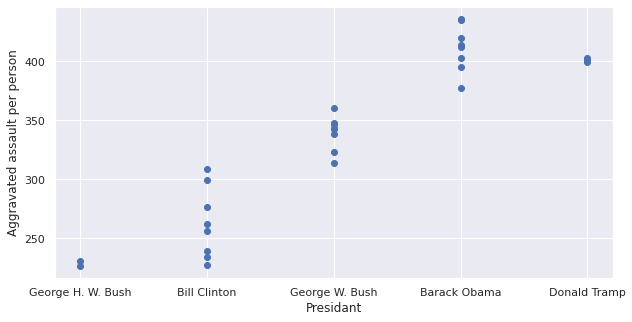

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Presidant'], df['Population']/df['Aggravated assault'])
ax.set_xlabel('Presidant')
ax.set_ylabel('Aggravated assault per person')
plt.show()

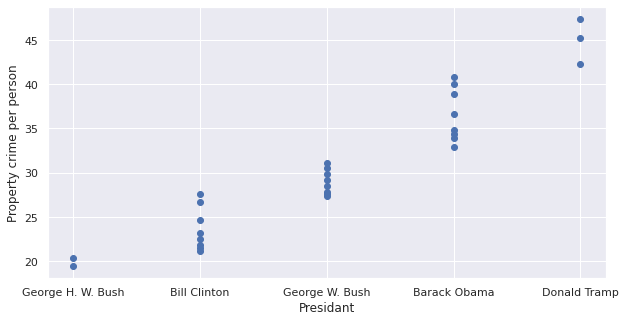

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Presidant'], df['Population']/df['Property crime'])
ax.set_xlabel('Presidant')
ax.set_ylabel('Property crime per person')
plt.show()

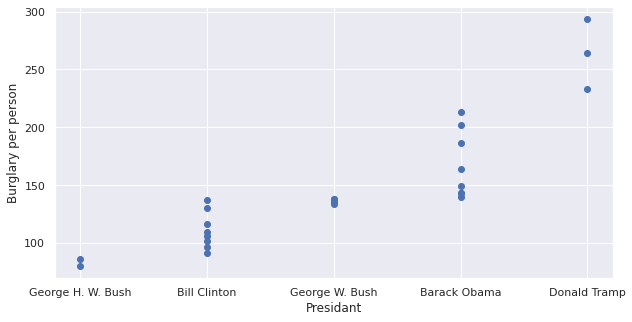

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Presidant'], df['Population']/df['Burglary'])
ax.set_xlabel('Presidant')
ax.set_ylabel('Burglary per person')
plt.show()

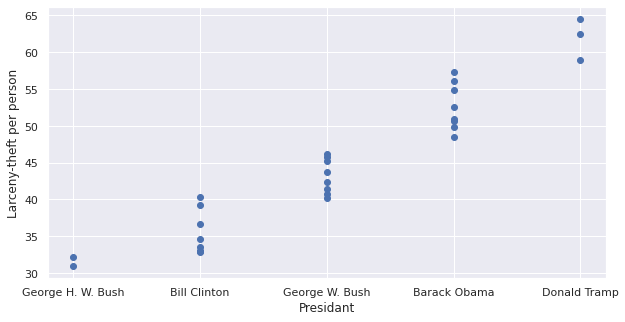

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Presidant'], df['Population']/df['Larceny-theft'])
ax.set_xlabel('Presidant')
ax.set_ylabel('Larceny-theft per person')
plt.show()

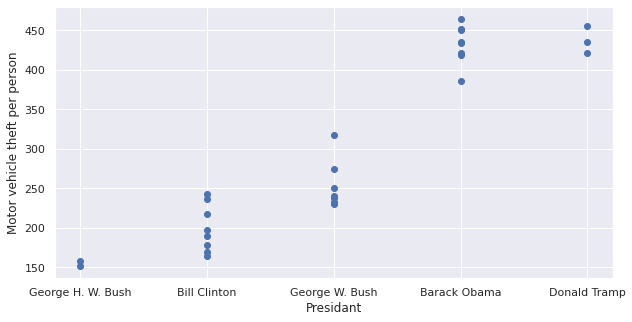

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Presidant'], df['Population']/df['Motor vehicle theft'])
ax.set_xlabel('Presidant')
ax.set_ylabel('Motor vehicle theft per person')
plt.show()

[Text(0, 0.5, 'political currents'), Text(0.5, 0, 'Total number of crimes')]

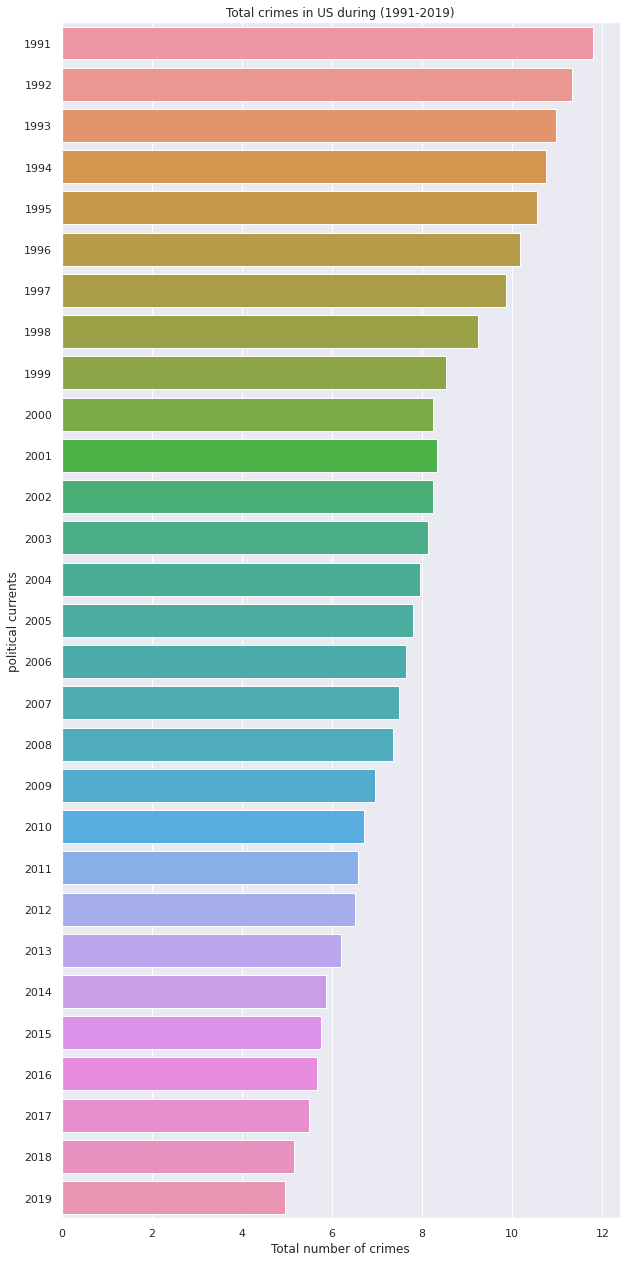

In [ ]:
ax=plt.figure(figsize=(10,22))
ax = sns.barplot((df['Total criame']/df['Population'])*100,                 
                 y=df['Year'],estimator=sum ,ci=0)
ax.set_title('Total crimes in US during (1991-2019)')
ax.set(xlabel='Total number of crimes', ylabel='Presidant')

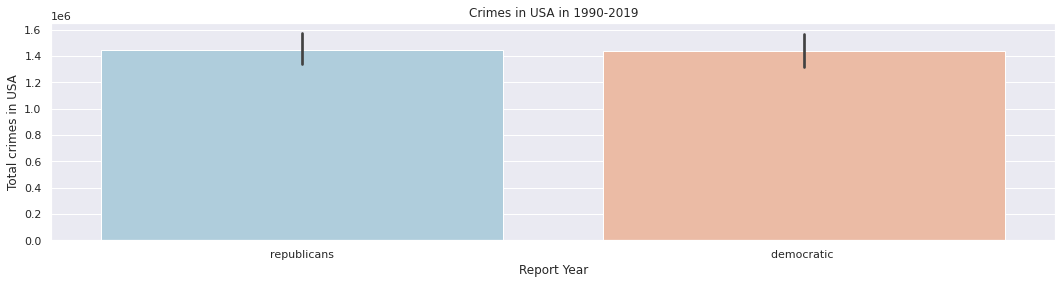

In [ ]:
plt.figure(figsize=(18,4))
sns.barplot(df["political currents"], df["Violent crime"], palette="RdBu_r",)
plt.ylabel("Total crimes in USA")
plt.title('Crimes in USA in 1990-2019')
plt.xlabel("Report Year")
plt.show()

In [ ]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df.describe()



,Population,Violent crime,Murder and nonnegligent \nmanslaughter,Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Total criame
count,2.900000e+01,2.900000e+01,29.000000,29.000000,29.000000,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,2.933232e+08,1.442052e+06,17515.517241,94204.482759,435250.758621,8.950814e+05,9.973769e+06,2.145939e+06,6.734469e+06,1.093361e+06,2.283164e+07
std,2.443493e+07,2.447367e+05,3082.525873,6801.118210,114822.133130,1.268791e+05,1.637862e+06,4.779880e+05,8.849013e+05,3.220360e+05,3.732750e+06
min,2.521531e+08,1.153022e+06,14164.000000,82109.000000,267988.000000,7.267770e+05,6.925677e+06,1.117696e+06,5.086096e+06,6.868030e+05,1.625897e+07
25%,2.702480e+08,1.247917e+06,15586.000000,90178.000000,354746.000000,8.103190e+05,9.001992e+06,2.050992e+06,6.151095e+06,7.519040e+05,2.043810e+07
50%,2.965071e+08,1.394461e+06,16465.000000,94347.000000,414235.000000,8.622200e+05,1.017475e+07,2.155448e+06,6.783447e+06,1.160002e+06,2.313100e+07
75%,3.138737e+08,1.533887e+06,17413.000000,97470.000000,449246.000000,9.765830e+05,1.095183e+07,2.332735e+06,7.376311e+06,1.261226e+06,2.497143e+07
max,3.282395e+08,1.932274e+06,24703.000000,109062.000000,687732.000000,1.135607e+06,1.296112e+07,3.157150e+06,8.142228e+06,1.661738e+06,2.974577e+07


Single Leakage:
The distance between 2 clusters is defined as the shortest distance between points in the two clusters

Text(0, 0.5, 'Euclidean distances')

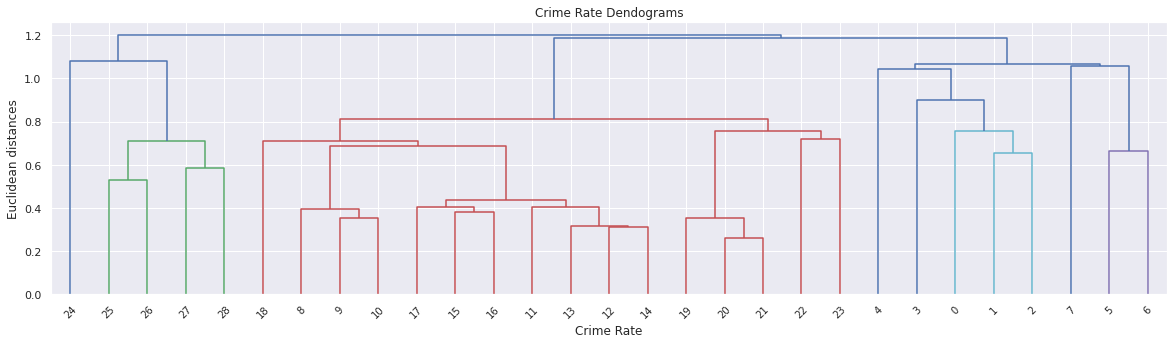

In [ ]:
data = df.iloc[:,3:11].values
scaled_data = scaler.fit_transform(data)
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')


Text(0, 0.5, 'Euclidean distances')

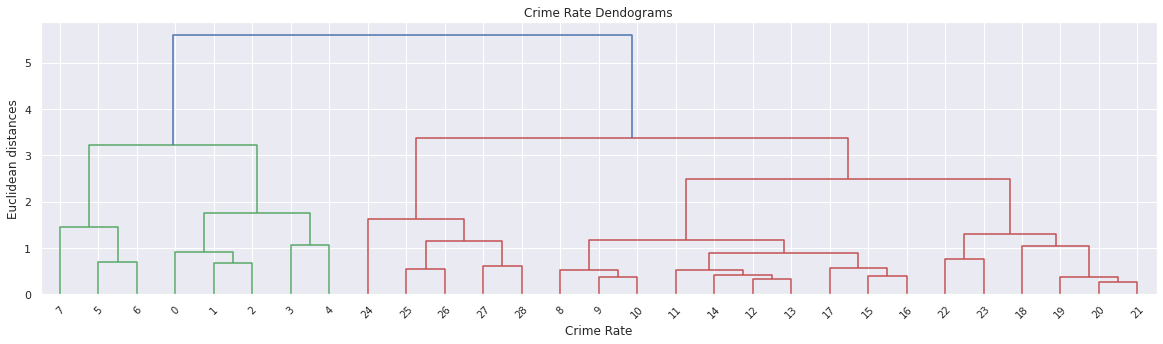

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

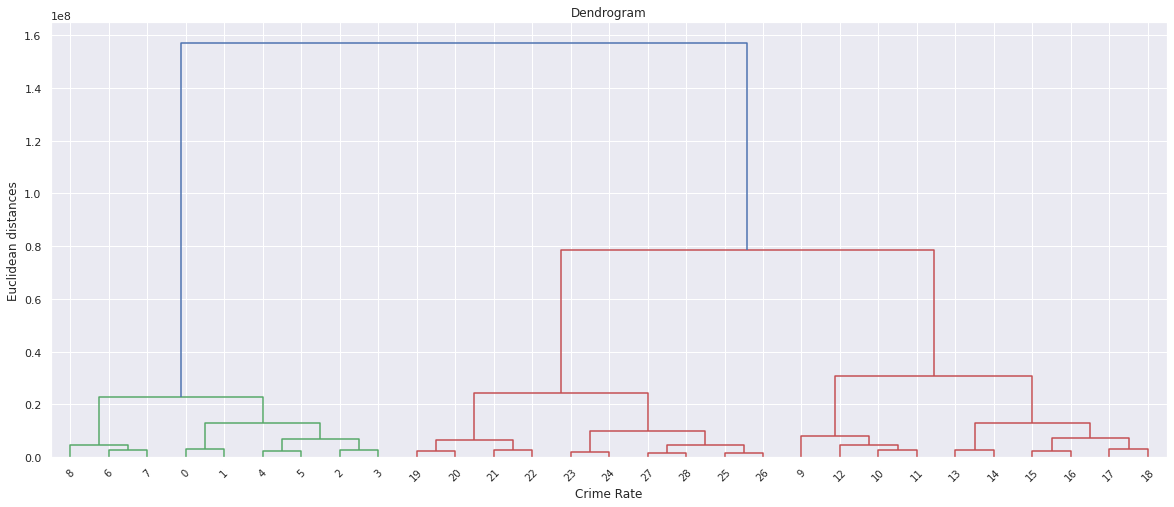

In [ ]:
# With Ward method
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

In [14]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [17]:
clf = DecisionTreeClassifier()
feature_cols=['Larceny-theft','Robbery','Property crime','Burglary','Total criame']
X = df[feature_cols] # Features
y = df['political currents'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))






Accuracy: 0.6666666666666666


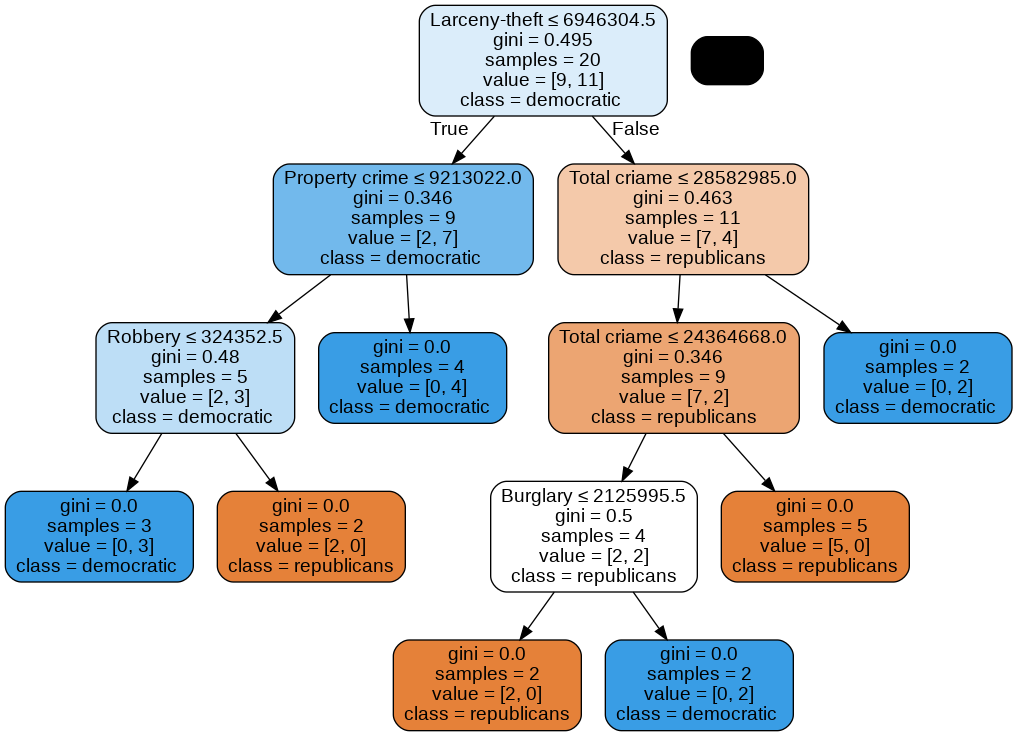

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                # special_characters = True,feature_names = feature_cols,class_names = 'George H. W. Bush','Bill Clinton','Barack Obama','Donald Tramp')
                # special_characters = True,feature_names = feature_cols,class_names = df['Presidant'])
                special_characters = True,feature_names = feature_cols,class_names = ['republicans','democratic '])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5555555555555556


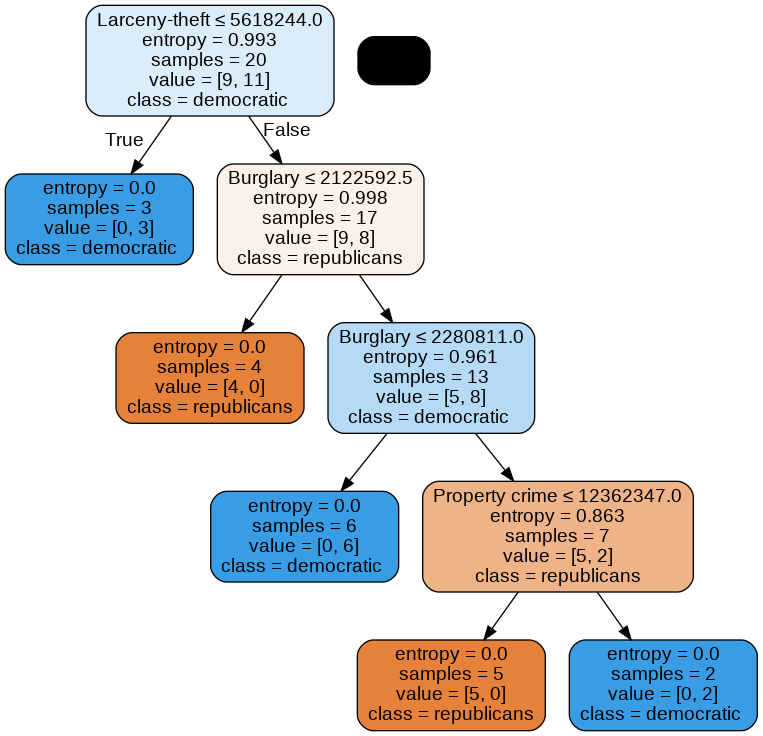

In [20]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['republicans','democratic '])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())